In [1]:
import dutchsoils as ds

# DutchSoils structure
DutchSoils has two classes:
* SoilMap:  
    * Downloads the Dutch soil map.
    * Finds the soilprofile at a certain location.
* SoilProfile:  
    * Gives the texture and hydraulic parametrisation (according to the Staring series) of the layers in a SoilProfile.
    * Exports necessary data for [pyswap](https://github.com/zawadzkim/pySWAP).

## Example SoilMap  

NOT YET IMPLEMENTED

## Example SoilProfile

In [2]:
sp = ds.SoilProfile(bofek_cluster=1001)

### Display data

In [3]:
sp.get_data()

,soil_id,soil_unit,soil_name,soil_classification,soil_landuse,bofek_cluster,bofek_dominant,bofek_name,bofek_area,layer_number,...,layer_porgmat,layer_pclay,layer_psilt,layer_bdens,layer_wcres,layer_wcsat,layer_VGalfa,layer_VGnpar,layer_VGlexp,layer_ksatfit
0,1050,hVc,"Koopveengronden op zeggeveen, rietzeggeveen of...",Veengronden,grasland,1001,1,Dikke veengronden: kleiig moerige bovengrond o...,18683.70445,1,...,35.0,40,40,0.477,0.00,0.718626,0.019062,1.136658,0.0001,4.483735
1,1050,hVc,"Koopveengronden op zeggeveen, rietzeggeveen of...",Veengronden,grasland,1001,1,Dikke veengronden: kleiig moerige bovengrond o...,18683.70445,2,...,50.0,60,35,0.436,0.01,0.848635,0.011929,1.271536,-1.2493,3.402009
2,1050,hVc,"Koopveengronden op zeggeveen, rietzeggeveen of...",Veengronden,grasland,1001,1,Dikke veengronden: kleiig moerige bovengrond o...,18683.70445,3,...,75.0,18,57,0.232,0.01,0.848635,0.011929,1.271536,-1.2493,3.402009
3,1050,hVc,"Koopveengronden op zeggeveen, rietzeggeveen of...",Veengronden,grasland,1001,1,Dikke veengronden: kleiig moerige bovengrond o...,18683.70445,4,...,80.0,18,57,0.226,0.01,0.848635,0.011929,1.271536,-1.2493,3.402009


### Plot profile

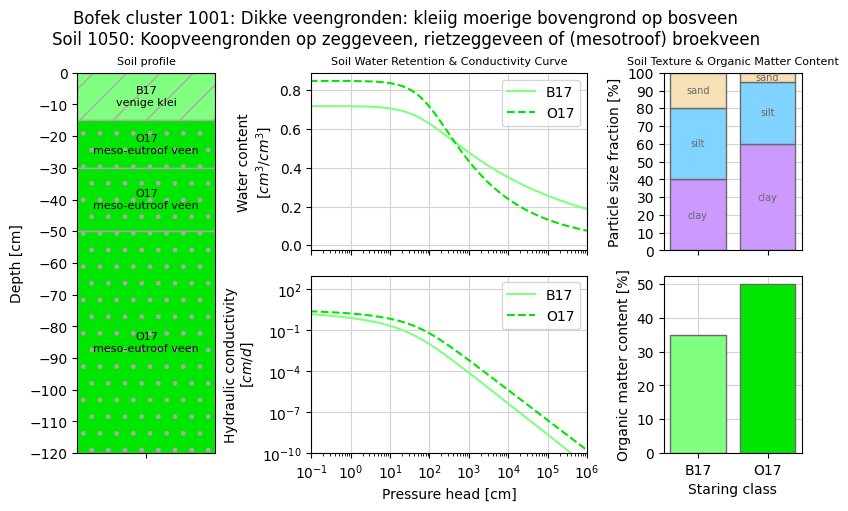

In [4]:
sp.plot()

In [5]:
sp.get_swapinput_profile(
    discretisation_compheights=[1, 2, 5, 10, 20],
    discretisation_depths=[10, 20, 30, 40, 100]
)

{'ISUBLAY': [1, 2, 3, 4, 5, 6, 7, 8],
 'ISOILLAY': [1, 1, 2, 2, 3, 4, 4, 4],
 'HSUBLAY': [11, 4, 1, 14, 20, 10, 40, 100],
 'HCOMP': [1, 2, 1, 2, 5, 5, 10, 20],
 'NCOMP': [11, 2, 1, 7, 4, 2, 4, 5]}